<a href="https://colab.research.google.com/github/greeshmathilakan369/Maternity_risk_prediction/blob/main/Algomox_levelB_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step1:Import packages

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#step2:Loading & Understanding the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("complaints-2021-09-08_07_12.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/27/21,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,None,Bonneville Billing and Collections,FL,33256,None,None,Web,08/27/21,Closed with explanation,Yes,NaN,4669189.0
1,08/08/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,None,BOEING EMPLOYEES CREDIT UNION,WA,None,None,None,Web,08/08/21,Closed with explanation,Yes,NaN,4612302.0
2,08/14/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,None,"Frontline Asset Strategies, LLC",GA,300XX,None,None,Web,08/14/21,Closed with explanation,Yes,NaN,4632146.0
3,08/27/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,None,"Credence Resource Management, LLC",OH,43213,None,None,Web,08/27/21,In progress,Yes,NaN,4668465.0
4,08/25/21,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,Company has responded to the consumer and the ...,"I.C. System, Inc.",FL,32839,None,Consent not provided,Web,08/25/21,Closed with explanation,Yes,NaN,4658212.0


In [4]:
df.shape

(15139, 18)

In [5]:
df1 = df[['Product', 'Consumer complaint narrative']]
df1.columns = ['Product', 'Consumer complaint']

In [6]:
df1 = df1[df1['Consumer complaint'].isna() != True]



In [7]:
df1.head()

,Product,Consumer complaint
41,"Credit reporting, credit repair services, or o...",Experian has allowed 6 inquiries on my credit ...
44,"Credit reporting, credit repair services, or o...",I submitted documentation from XXXX that I sub...
121,"Credit reporting, credit repair services, or o...",I contacted XXXX XXXX to inquire as to why a t...
122,Debt collection,IC Systems Re : Dispute of Account No. XXXX XX...
153,"Credit reporting, credit repair services, or o...",This is the 3 time I have disputed and filed a...


In [ ]:
# step:3 Feature Engineering

# Under Feature Engineering we do some data manipulation in order to train the model efficiently and get a better insight into the data.

In [8]:
pd.DataFrame(df1.Product.unique()).values

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Debt collection'],
       ['Checking or savings account'],
       ['Mortgage'],
       ['Credit card or prepaid card'],
       ['Money transfer, virtual currency, or money service'],
       ['Vehicle loan or lease'],
       ['Payday loan, title loan, or personal loan'],
       ['Student loan']], dtype=object)

In [9]:
df1.replace({'Product': 
             { 
              'Credit reporting': 'Repair or Credit reporting',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
            'credit repair services,Credit reporting , or other personal consumer reports': 
            'Repair or Credit reporting',
             'Money transfer': 'Money transfer, virtual currency, or money service',
            'Payday loan': 'title loan,Payday ,Personal loan',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [10]:
# pd.DataFrame(df1.Product.unique()).values

In [11]:
df2 = df1.sample(1000, random_state=1).copy()

In [12]:
df2['category_id'] = df2['Product'].factorize()[0]

In [13]:
df2.head()

,Product,Consumer complaint,category_id
2276,"Credit reporting, credit repair services, or o...",Hello I hope your day is going well and you an...,0
13738,"Credit reporting, credit repair services, or o...",I have submitted several disputes to TransUnio...,0
14915,"Credit reporting, credit repair services, or o...","Good afternoon, I am writing to you because I ...",0
5550,"Credit reporting, credit repair services, or o...",National Credit Audit Corporation has knowingl...,0
7955,"Credit reporting, credit repair services, or o...",I have filed a dispute in regards to the incor...,0


In [14]:
category_id = df2[['Product', 'category_id']].drop_duplicates()
id_2_category = dict(category_id[['category_id', 'Product']].values)

# Industrial Application of NLP

In [15]:
id_2_category

{0: 'Credit reporting, credit repair services, or other personal consumer reports',
 1: 'Debt collection',
 2: 'Credit card or prepaid card',
 3: 'Checking or savings account',
 4: 'Mortgage',
 5: 'Money transfer, virtual currency, or money service',
 6: 'Vehicle loan or lease',
 7: 'Payday loan, title loan, or personal loan',
 8: 'Student loan'}

In [ ]:
# step:4 Performing EDA

Text(0.5, 0, 'Number of ocurrences')

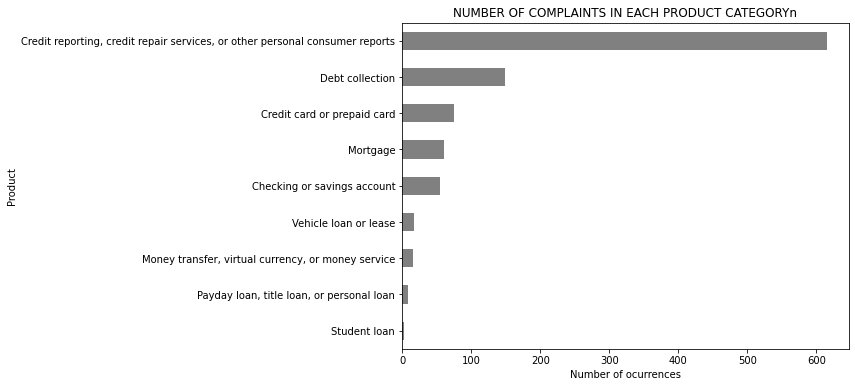

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product')['Consumer complaint'].count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORYn')
plt.xlabel('Number of ocurrences', fontsize = 10)

In [ ]:
# step5: Feature Engineering

# Now we need to convert the Complaint text into some vectors since the machine can’t understand the textual data. This process is called Feature Extraction.

# We are  use tf-idf Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [18]:
# Vectorization
features = tfidf.fit_transform(df2['Consumer complaint']).toarray()
labels = df2.category_id

In [ ]:
# Splitting the Dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.25,
                                                    random_state = 1)

In [ ]:
# step:6. Model Training

In [20]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [ ]:
# step:7. Evaluation and Testing

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [22]:
y_pred = model.predict(X_test)

In [24]:
df2['Product'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Credit card or prepaid card',
       'Checking or savings account', 'Mortgage',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Student loan'],
      dtype=object)

In [25]:
y_pred

array([1, 0, 0, 1, 0, 1, 3, 0, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       2, 0, 0, 0, 3, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 4, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 3, 1, 3, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0,
       1, 0, 2, 1, 2, 4, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 4, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 2,
       0, 0, 4, 1, 2, 0, 0, 0])

In [26]:
y_test

11826    1
1589     0
271      0
11013    1
13104    0
        ..
3521     1
2480     2
7252     1
6315     0
12546    0
Name: category_id, Length: 250, dtype: int64

In [ ]:
# Plotting Confusion Matrix

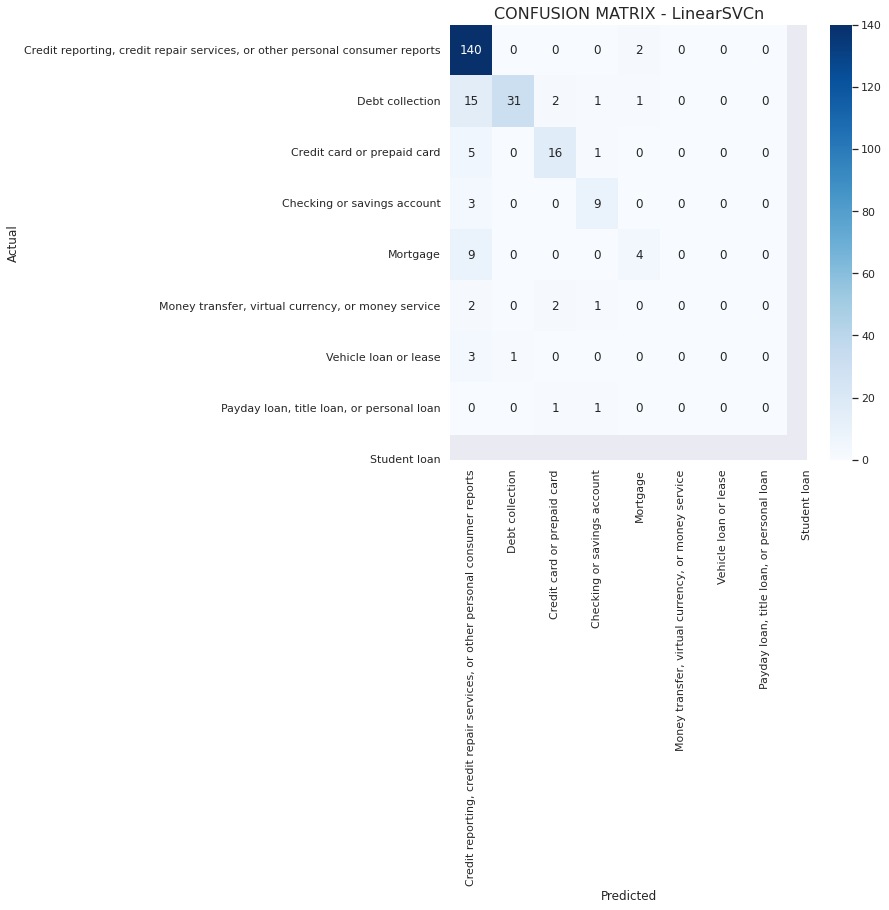

In [28]:
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id.Product.values, 
            yticklabels=category_id.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [ ]:
# step:7. Prediction

In [34]:
complain = """I have been enrolled back in 2019 to Indian University. Few days ago , i have been harassed by 
Navient. I have already faxed the paperwork providing them with everything they wanted. And still getting 
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late for the payment. At this point, 
Navient needs take their act together to avoid me taking further steps"""

In [35]:
complain

'I have been enrolled back in 2019 to Indian University. Few days ago , i have been harassed by \nNavient. I have already faxed the paperwork providing them with everything they wanted. And still getting \nphone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late for the payment. At this point, \nNavient needs take their act together to avoid me taking further steps'

In [36]:
complaint_id = (model.predict(tfidf.transform([complain])))

In [37]:
print("complain", id_2_category[complaint_id[0]])

complain Credit reporting, credit repair services, or other personal consumer reports
